In [ ]:
pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyforest import*
lazy_imports()
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/letterdata.csv')

<IPython.core.display.Javascript object>

In [ ]:
df.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [ ]:
df.shape

(20000, 17)

## Split Data

In [ ]:
X=np.array(df)[:,1:16]
y=np.array(df.letter)[:]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X

array([[2, 8, 3, ..., 0, 8, 0],
       [5, 12, 3, ..., 2, 8, 4],
       [4, 11, 6, ..., 3, 7, 3],
       ...,
       [6, 9, 6, ..., 2, 12, 2],
       [2, 3, 4, ..., 1, 9, 5],
       [4, 9, 6, ..., 2, 7, 2]], dtype=object)

In [ ]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [ ]:
X_train=X[0:16000,0:17]
X_test=X[16001:,:]
y_train=y[:16000]
y_test=y[16001:]

## Building SVM

In [ ]:
from sklearn import svm
model=svm.SVC(C=3)

In [ ]:
model.fit(X_train,y_train)

SVC(C=3)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [ ]:
model.score(X_test,y_test)

0.927231807951988

In [ ]:
y_grid=(np.column_stack([y_test, y_pred]))

<IPython.core.display.Javascript object>

In [ ]:
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [ ]:
import string
lab=list(string.ascii_uppercase[0:26])
plab=["Predicted "+ s for s in lab]

In [ ]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [ ]:
plab

['Predicted A',
 'Predicted B',
 'Predicted C',
 'Predicted D',
 'Predicted E',
 'Predicted F',
 'Predicted G',
 'Predicted H',
 'Predicted I',
 'Predicted J',
 'Predicted K',
 'Predicted L',
 'Predicted M',
 'Predicted N',
 'Predicted O',
 'Predicted P',
 'Predicted Q',
 'Predicted R',
 'Predicted S',
 'Predicted T',
 'Predicted U',
 'Predicted V',
 'Predicted W',
 'Predicted X',
 'Predicted Y',
 'Predicted Z']

In [ ]:
from sklearn import metrics
import seaborn as sns
cm=metrics.confusion_matrix(y_test,y_pred,labels=lab)
df_cm=pd.DataFrame(cm, index=[i for i in lab], columns=[i for i in plab])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

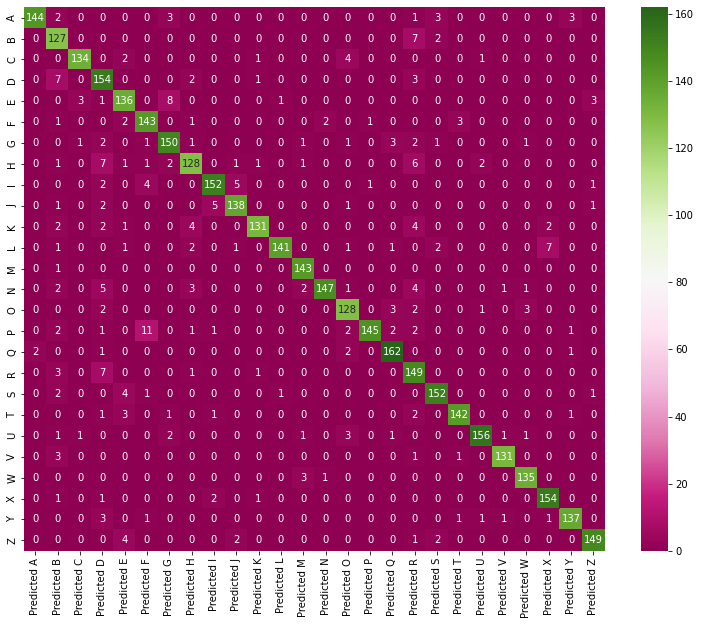

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='PiYG')
plt.show()